In [1]:
import re
import pandas as pd
from datetime import datetime

In [38]:
df_tweets = pd.read_csv('./tweets/ericschmidt.csv', parse_dates=['created_at'])

In [39]:
df_tweets.full_text = df_tweets.apply(lambda row: re.sub(r"http\S+", "", row.full_text).lower(), 1)
df_tweets.full_text = df_tweets.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.full_text.split())), 1)
df_tweets.full_text = df_tweets.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.full_text).split()), 1)
timestamps = df_tweets.created_at.to_list()
tweets = df_tweets.full_text.to_list()

In [42]:
from bertopic import BERTopic
topic_model = BERTopic(min_topic_size=5, verbose=True)
topics, _ = topic_model.fit_transform(tweets)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2022-01-17 10:37:25,485 - BERTopic - Transformed documents to Embeddings
2022-01-17 10:37:30,528 - BERTopic - Reduced dimensionality with UMAP
2022-01-17 10:37:30,604 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [43]:
freq = topic_model.get_topic_info(); freq.head(10)

,Topic,Count,Name
0,-1,270,-1_the_of_and_to
1,0,73,0_coach_dollar_trillion_rt
2,1,57,1_howgoogleworks_you_crazy_ideas
3,2,46,2_students_science_to_million
4,3,39,3_pandemic_covid_we_the
5,4,30,4_amp_tech_generation_to
6,5,30,5_learning_machine_automl_hood
7,6,27,6_seriously_cool_please_help
8,7,27,7_google_web_ipo_really
9,8,22,8_read_book_politics_accidentalpresidents


In [44]:
topic_nr = freq.iloc[2]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('howgoogleworks', 0.08196515985289973),
 ('you', 0.02704757043876141),
 ('crazy', 0.02495657869096133),
 ('ideas', 0.02395622811973019),
 ('rt', 0.023912477282942282),
 ('your', 0.02111189468185895),
 ('for', 0.01846088105235325),
 ('people', 0.017971085009033938),
 ('some', 0.017967171089797642),
 ('new', 0.016987029096137505)]

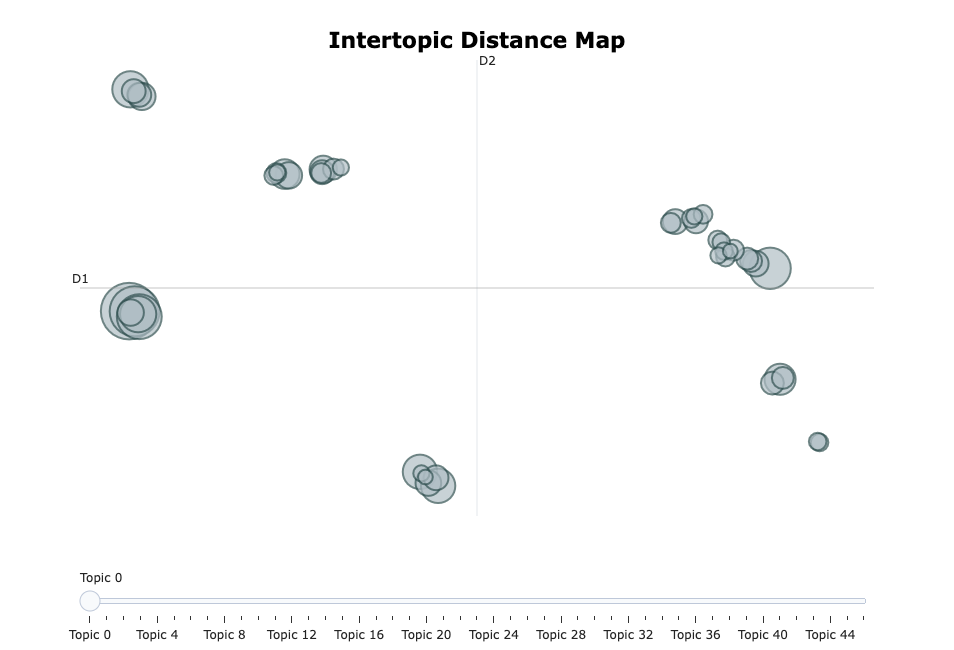

In [45]:
fig = topic_model.visualize_topics(); fig

In [46]:
topics_over_time = topic_model.topics_over_time(docs=tweets, 
                                                topics=topics, 
                                                timestamps=timestamps, 
                                                global_tuning=True, 
                                                evolution_tuning=True, 
                                                nr_bins=20)

20it [00:00, 33.96it/s]


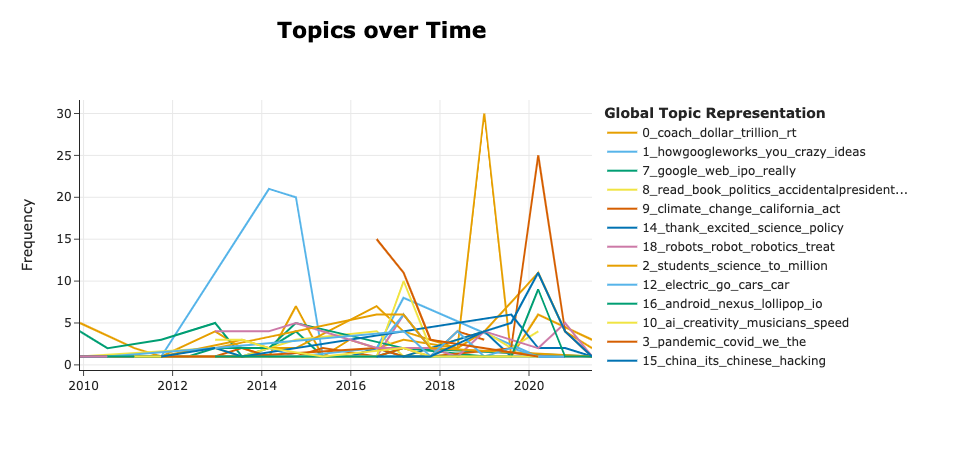

In [47]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20)